In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('parkinsons_disease_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [ ]:
print(f"Shape of Dataset: {df.shape}")

Shape of Dataset: (2105, 35)


In [ ]:
print("Desciption of Dataset:\n")
tmp = df.drop('PatientID', axis=1)
tmp.describe().T.style.bar(subset=['mean'], color='lightgreen')\
    .background_gradient(subset=['std', '50%'], cmap='YlGnBu')

Desciption of Dataset:



,count,mean,std,min,25%,50%,75%,max
Age,2105.000000,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
Gender,2105.000000,0.492637,0.500065,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2105.000000,0.692637,1.003827,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2105.000000,1.337292,0.895840,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2105.000000,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
Smoking,2105.000000,0.296437,0.456795,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2105.000000,10.040413,5.687014,0.002228,5.150278,10.070337,14.829565,19.988866
PhysicalActivity,2105.000000,5.016674,2.890919,0.004157,2.455703,5.031550,7.512795,9.995255
DietQuality,2105.000000,4.912901,2.872115,0.000011,2.478503,4.825187,7.381487,9.995864
SleepQuality,2105.000000,6.996639,1.753065,4.000497,5.488864,6.929819,8.558719,9.999821


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [ ]:
# Changing datatype to store memory
df['Diagnosis'] = df['Diagnosis'].astype('uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


# Data Preprocessing

In [ ]:
print(f"Number of Duplicate rows: {df.duplicated().sum()}")

Number of Duplicate rows: 0


In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr

        df = df[(df[col] >= lb) & (df[col] <= ub)]
    return df

In [ ]:
num_cols = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
    'MoCA', 'FunctionalAssessment'
]

df = remove_outliers(df, num_cols)

In [ ]:
def check_skewness(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    for col in columns:
        skew_val= skew(df[col])
        print(f"Skewness Value of {col} : {skew_val}")

        if abs(skew_val) > 0.5:
            df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))
    return df

In [ ]:
df = check_skewness(df, num_cols)

Skewness Value of Age : -0.03343593239128472
Skewness Value of BMI : 0.03514597194009876
Skewness Value of SystolicBP : 0.02850284153738077
Skewness Value of DiastolicBP : -0.05698068838651022
Skewness Value of CholesterolTotal : -0.050764828027915376
Skewness Value of CholesterolLDL : -0.01797859856240888
Skewness Value of CholesterolHDL : 0.0018535983858065574
Skewness Value of CholesterolTriglycerides : 0.01704538970433846
Skewness Value of UPDRS : -0.04823664544639951
Skewness Value of MoCA : -0.023913348087155558
Skewness Value of FunctionalAssessment : 0.011263783399985934


In [ ]:
cat_cols = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
    'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation', 'DoctorInCharge'
]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,522,267,847,1842,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,0
1,3059,75,0,0,2,16.247339,1,622,1758,1811,571,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,0
2,3060,70,1,0,0,15.368239,0,211,35,1396,2078,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,0
3,3061,52,0,0,0,15.454557,0,618,265,1444,78,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,0
4,3062,87,0,0,1,18.616042,0,1014,226,1016,1862,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,0


In [ ]:
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])
df[num_cols].describe()

,Age,BMI,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment
count,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03
mean,4.725700e-17,-3.864947e-16,-2.497870e-16,2.329095e-16,-4.556925e-16,1.282690e-16,-6.751000e-18,1.679311e-16,-1.383955e-16,1.299567e-16,2.700400e-16
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00
min,-1.691021e+00,-1.693104e+00,-1.650046e+00,-1.773413e+00,-1.762272e+00,-1.754165e+00,-1.696629e+00,-1.696517e+00,-1.791984e+00,-1.744380e+00,-1.700608e+00
25%,-8.283386e-01,-8.918918e-01,-8.952167e-01,-8.940313e-01,-8.599467e-01,-8.596478e-01,-8.616046e-01,-8.875910e-01,-8.548759e-01,-8.768879e-01,-8.774791e-01
50%,3.434335e-02,-3.458318e-03,-2.716309e-02,4.397606e-02,3.826188e-02,1.697622e-02,-1.399486e-02,-1.355116e-03,2.025001e-02,-1.513018e-02,-2.204986e-03
75%,8.970253e-01,8.676969e-01,8.786320e-01,8.647325e-01,8.661790e-01,8.702252e-01,8.429688e-01,8.712791e-01,8.557453e-01,8.695849e-01,8.504511e-01
max,1.673439e+00,1.774869e+00,1.708944e+00,1.685489e+00,1.677463e+00,1.701468e+00,1.725285e+00,1.737820e+00,1.723961e+00,1.721544e+00,1.705659e+00


# EDA

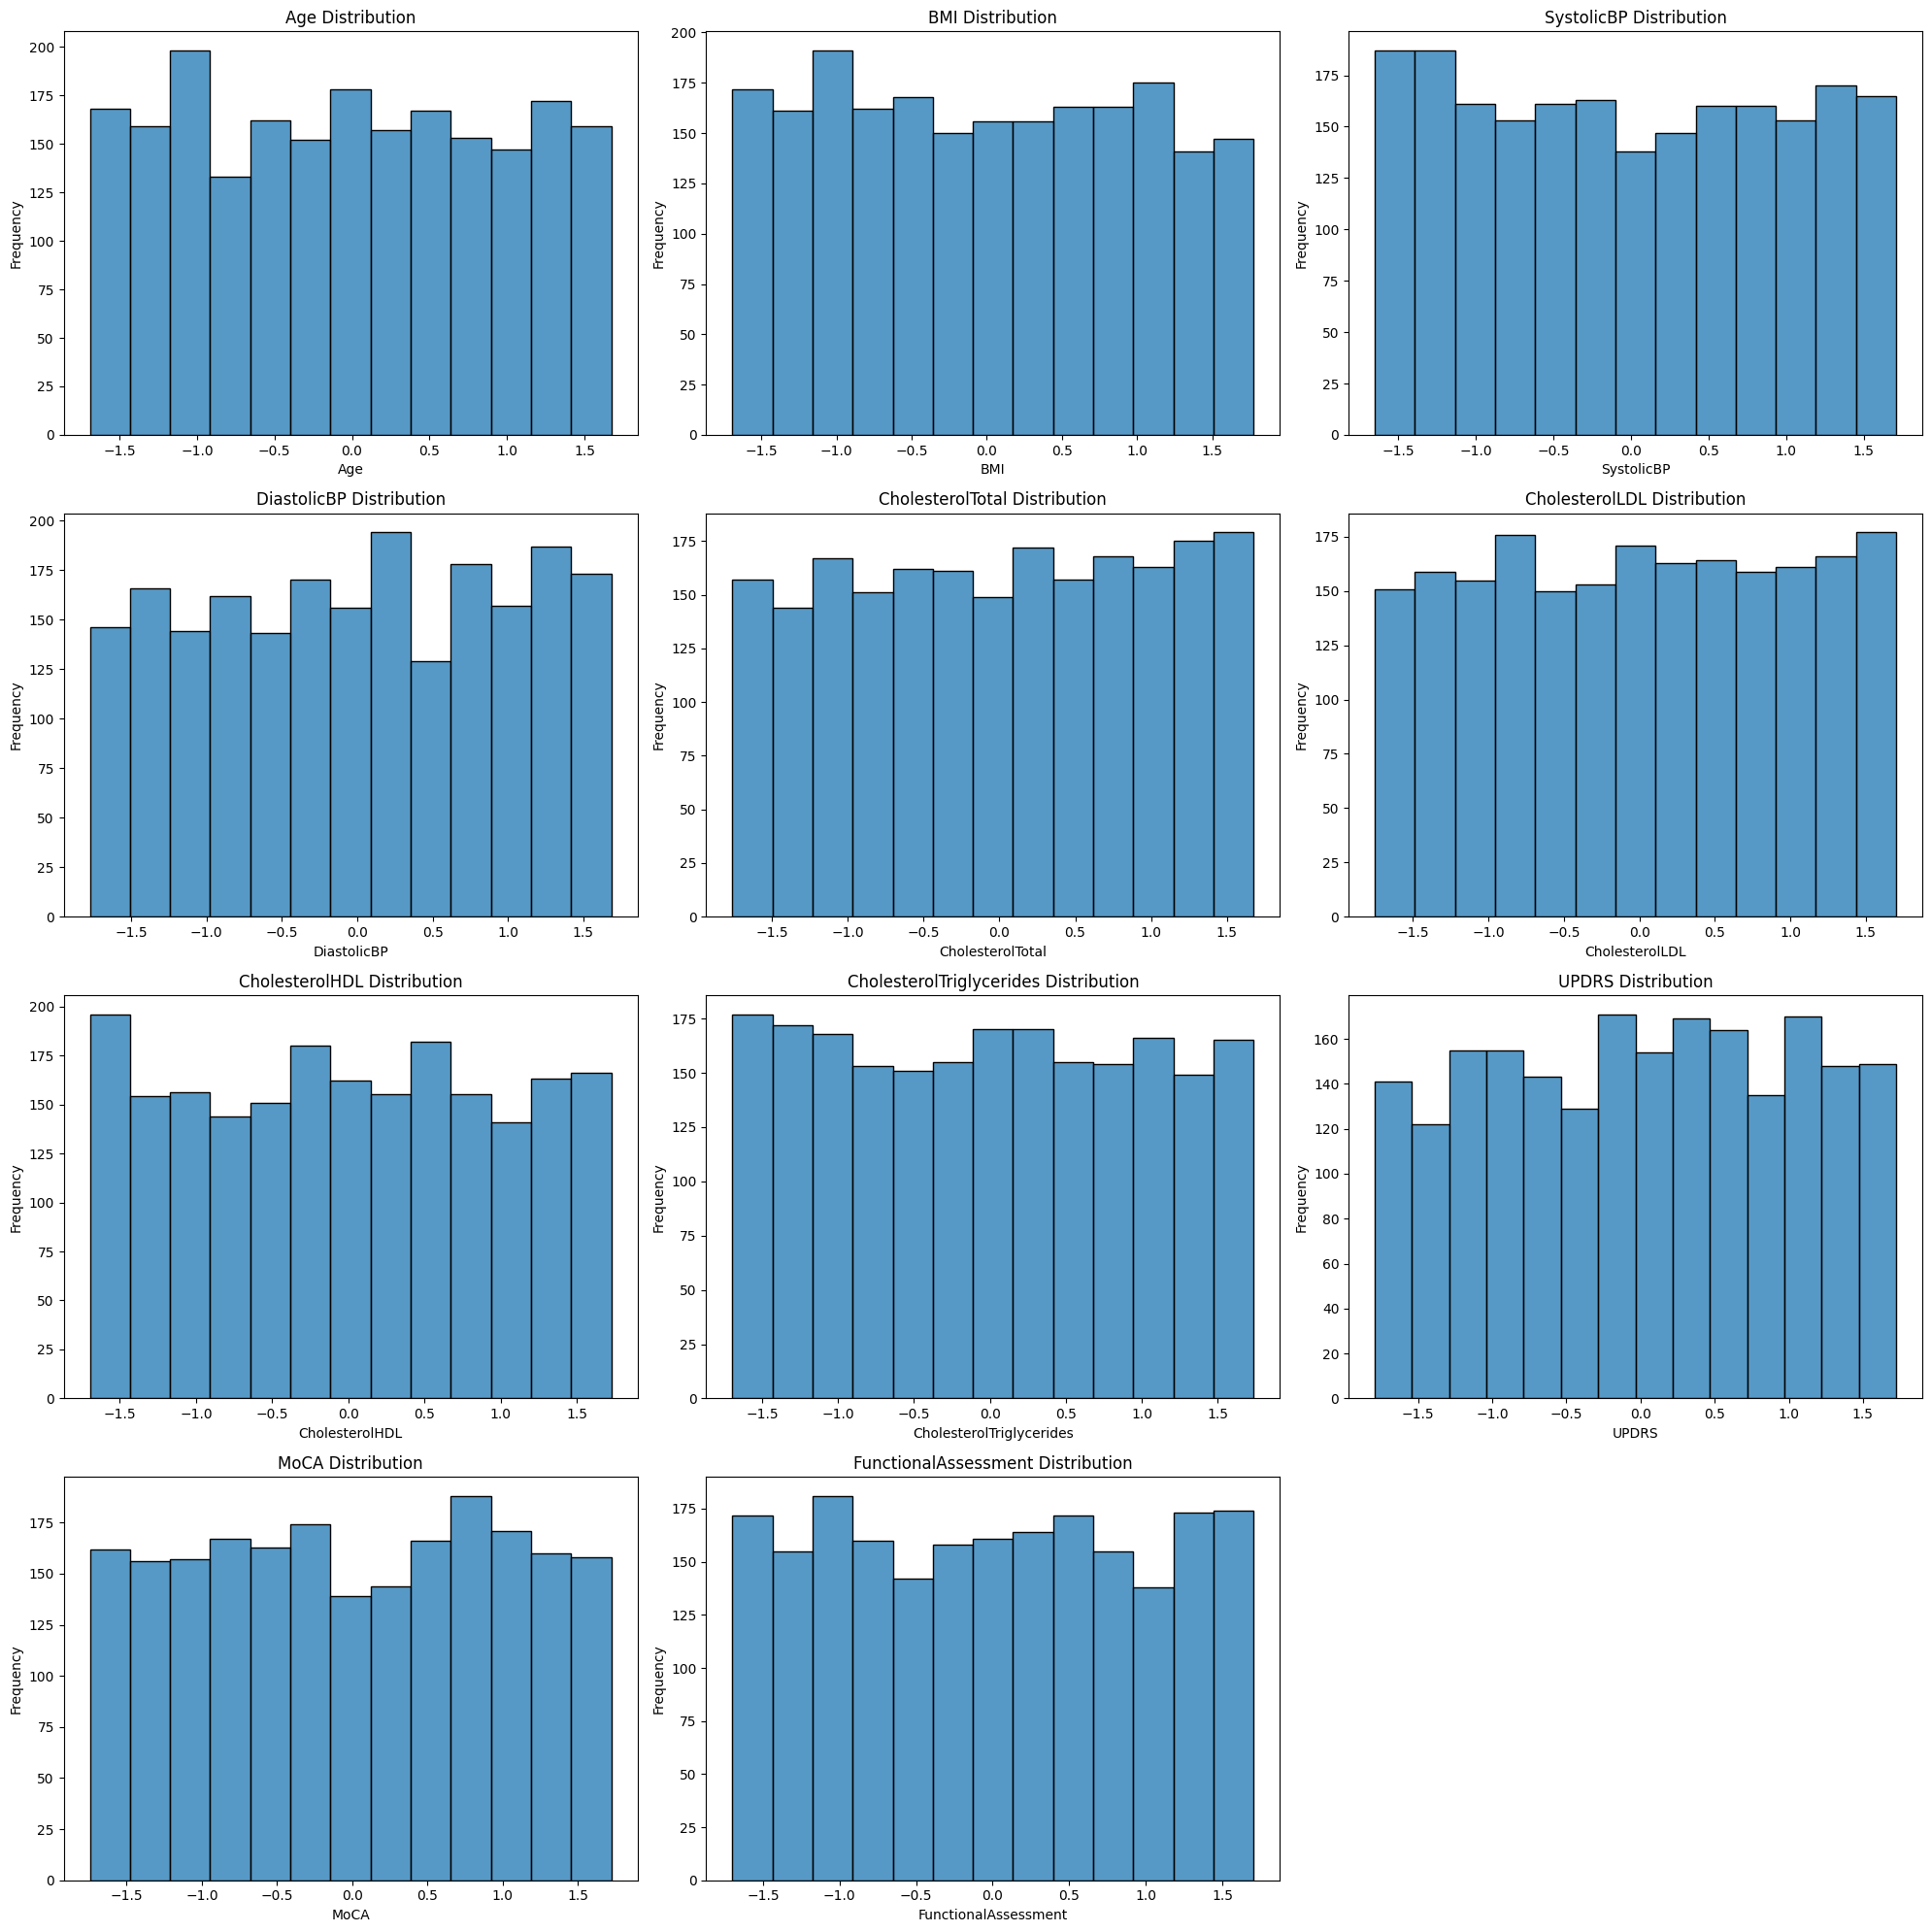

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col])
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

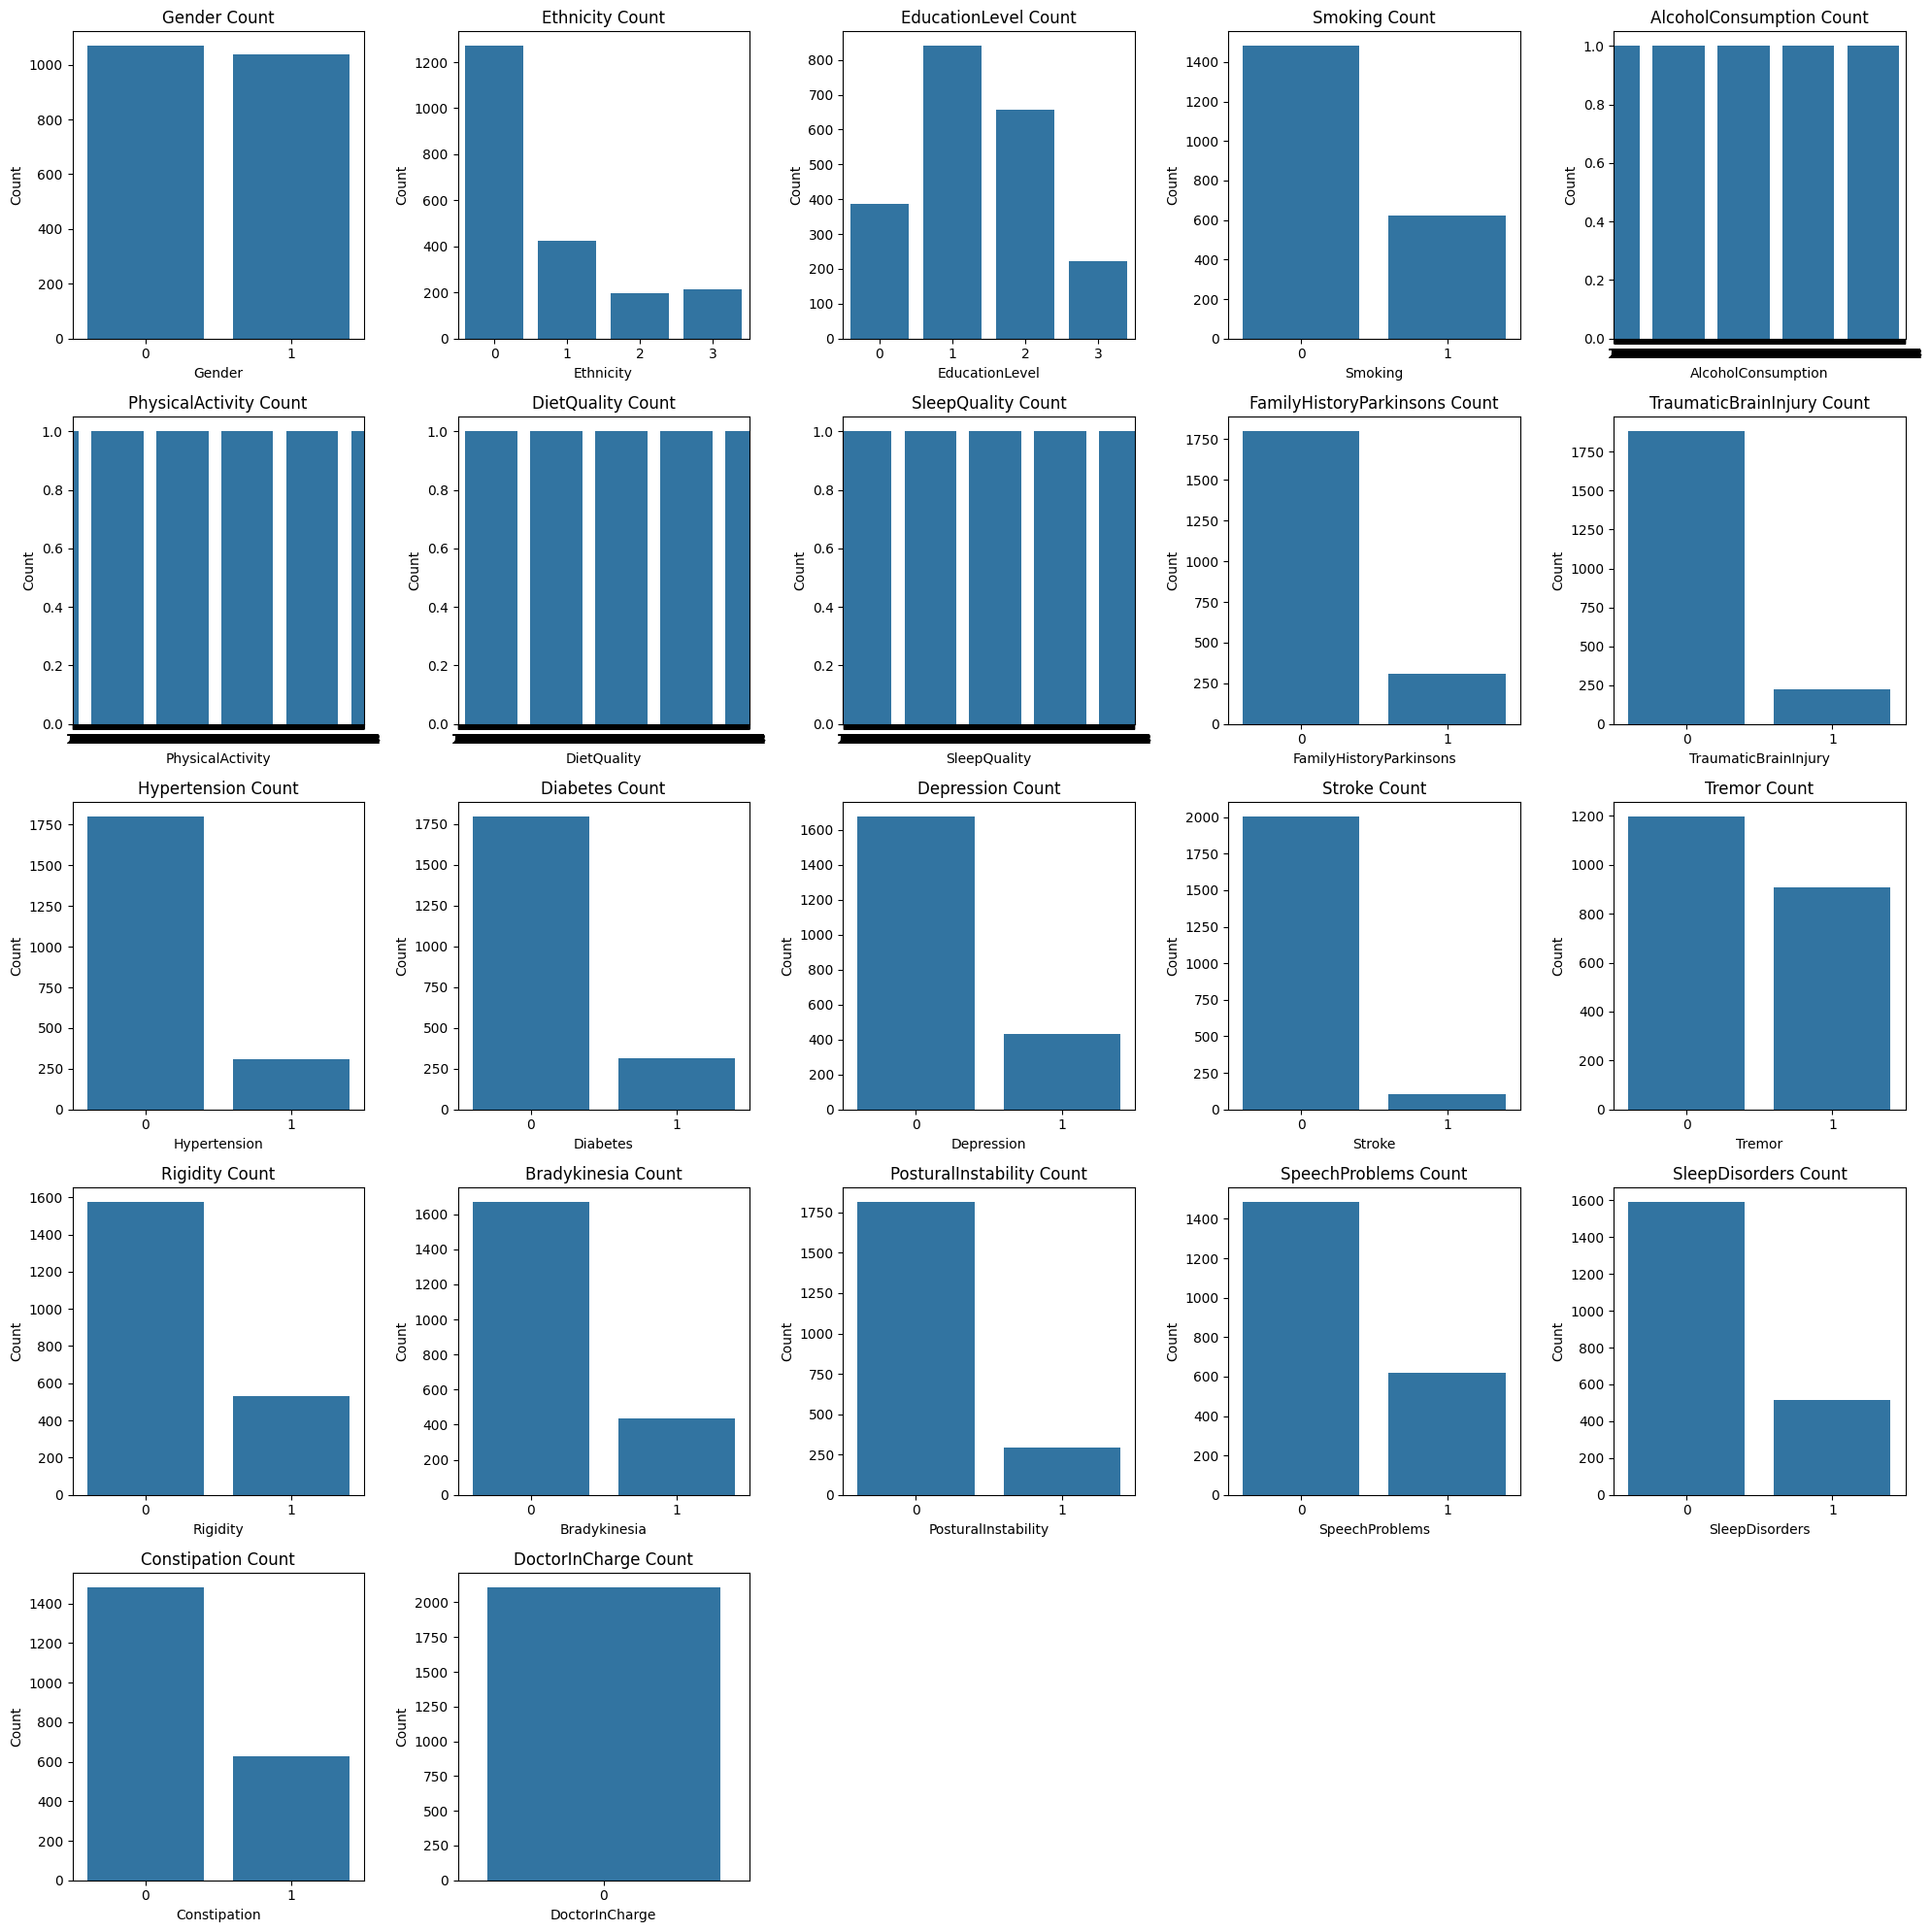

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 5, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

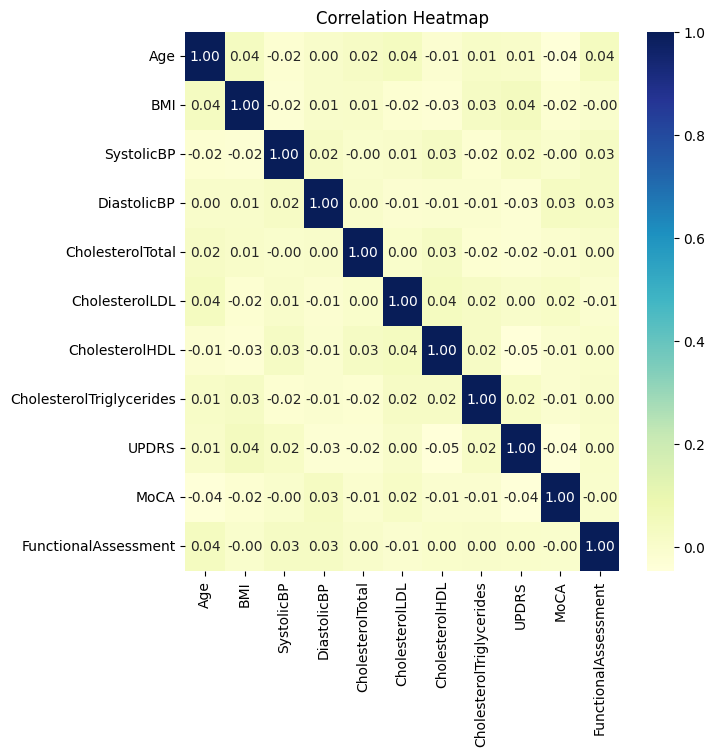

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model Training

In [ ]:
X, y = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1), df['Diagnosis']

In [ ]:
def train_test_split(X, y, test_size=0.2):
    ind = np.arange(len(X))
    np.random.shuffle(ind)

    train_ind = ind[:int((1 - test_size) * len(X))]
    test_ind = ind[int((1 - test_size) * len(X)):]

    X_train, X_test = X.values[train_ind], X.values[test_ind]
    y_train, y_test = y.values[train_ind], y.values[test_ind]
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.2)
print(f"Number of samples in Training Set: {X_train.shape[0]}")
print(f"Number of samples in Testing Set: {X_test.shape[0]}")

Number of samples in Training Set: 1684
Number of samples in Testing Set: 421


In [ ]:
print(f"Number of positive diagnosis samples in Training set: {y_train.sum()}")
print(f"Number of negative diagnosis samples in Training set: {int(y_train.shape[0] - y_train.sum())}")

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

print(f"Number of positive diagnosis samples in Training set: {y_train.sum()}")
print(f"Number of negative diagnosis samples in Training set: {int(y_train.shape[0] - y_train.sum())}")

Number of positive diagnosis samples in Training set: 1024
Number of negative diagnosis samples in Training set: 660
Number of positive diagnosis samples in Training set: 1024
Number of negative diagnosis samples in Training set: 1024


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

In [ ]:
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10, 50],
        'min_samples_leaf': [2, 5, 10, 50],
        'criterion': ['entropy', 'gini']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 50]
    },
    'Gradient Boosting': {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.001, 0.003, 0.01, 0.1, 0.3],
        'max_depth': [3, 5, 10, 20]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
}


In [ ]:
best_params = {}
best_models = []
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grids[model_name],
                               scoring=['accuracy', 'precision', 'recall'],
                               refit='accuracy',
                               cv=2, verbose=1, n_jobs=-1
                              )
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Training {model_name} with the best paramters.")

    model.set_params(**best_params[model_name])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    clr = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{clr}")
    best_models.append({
                        'model_name': model_name,
                        'Accuracy': accuracy,
#                         'Report': clr,
                        'Precision': precision_score(y_test, y_pred),
                        'Recall': recall_score(y_test, y_pred),
                        'F1 Score': f1_score(y_test, y_pred)
                      })

Running GridSearchCV for Logistic Regression
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best params for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Training Logistic Regression with the best paramters.
Logistic Regression Accuracy: 0.7862
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.76      0.70       141
           1       0.87      0.80      0.83       280

    accuracy                           0.79       421
   macro avg       0.76      0.78      0.77       421
weighted avg       0.80      0.79      0.79       421

Running GridSearchCV for Decision Tree
Fitting 2 folds for each of 128 candidates, totalling 256 fits
Best params for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Training Decision Tree with the best paramters.
Decision Tree Accuracy: 0.8670
Classification Report for Decision Tree:
              pr

In [ ]:
results_df = pd.DataFrame(best_models)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df

,model_name,Accuracy,Precision,Recall,F1 Score
3,Gradient Boosting,0.919240,0.922794,0.950758,0.936567
2,Random Forest,0.895487,0.901460,0.935606,0.918216
1,Decision Tree,0.881235,0.893382,0.920455,0.906716
0,Logistic Regression,0.793349,0.867220,0.791667,0.827723


In [ ]:
best_params['Gradient Boosting']

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}

Best Model: **Gradient Boost Classification:**
* Accuracy: 0.916865
* Precision: 0.948207
* Recall: 0.915385
* F1 Score: 0.931507

# ANN Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
if torch.cuda.is_available():
    device = torch.device(type="cuda", index=0)
else:
    device = torch.device(type="cpu", index=0)
print(device)

cpu:0


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        self.length = X.shape[0]
    def __len__(self):
        return self.length
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_ds = CustomDataset(X_train, y_train)
test_ds = CustomDataset(X_test, y_test)

In [ ]:
batch_size = 16
train_dl = DataLoader(
    train_ds,
    batch_size=batch_size,
    shuffle=True
)

test_dl = DataLoader(
    test_ds,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
def train_one_epoch(model, dl, loss_fn, optim):
    model.train()
    track_loss = 0
    num_corr = 0
    for i, (inps, labels) in enumerate(dl):
        pred = model(inps)
        loss = loss_fn(pred, labels)

        track_loss += loss.item()
        num_corr += (torch.argmax(pred, dim=1) == labels).type(torch.float).sum().item()
        running_loss = round(track_loss / (i + (inps.shape[0] / batch_size)), 2)
        running_acc = round((num_corr / ((i * batch_size + inps.shape[0]))) * 100, 2)

        loss.backward()
        optim.step()
        optim.zero_grad()
    epoch_loss = running_loss
    epoch_acc = running_acc

    return epoch_loss, epoch_acc

In [ ]:
def eval_one_epoch(model, dl, loss_fn):
    model.train()
    track_loss = 0
    num_corr = 0
    with torch.no_grad():
        for i, (inps, labels) in enumerate(dl):
            pred = model(inps)
            loss = loss_fn(pred, labels)

            track_loss += loss.item()
            num_corr += (torch.argmax(pred, dim=1) == labels).type(torch.float).sum().item()
            running_loss = round(track_loss / (i + (inps.shape[0] / batch_size)), 2)
            running_acc = round((num_corr / ((i * batch_size + inps.shape[0]))) * 100, 2)

    epoch_loss = running_loss
    epoch_acc = running_acc

    return epoch_loss, epoch_acc

In [ ]:
class MultiLayerANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(32, 128)
        self.fc2 = nn.Linear(128, 2)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
model = MultiLayerANN()
n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
lr = 0.001
optim = torch.optim.Adam(params=model.parameters(), lr=lr)
for i in range(n_epochs):
    print(f"Epoch No: {i + 1}")
    train_one_loss, train_one_acc = train_one_epoch(model, train_dl, loss_fn, optim)
    print(f"Training Loss: {train_one_loss} Training Accuracy: {train_one_acc}")
    eval_one_loss, eval_one_acc = eval_one_epoch(model, test_dl, loss_fn)
    print(f"Testing Loss: {eval_one_loss} Testing Accuracy: {eval_one_acc}")

Epoch No: 1
Training Loss: 6.92 Training Accuracy: 53.03
Testing Loss: 3.34 Testing Accuracy: 40.86
Epoch No: 2
Training Loss: 2.44 Training Accuracy: 53.56
Testing Loss: 1.96 Testing Accuracy: 55.34
Epoch No: 3
Training Loss: 1.44 Training Accuracy: 59.28
Testing Loss: 1.77 Testing Accuracy: 54.63
Epoch No: 4
Training Loss: 1.81 Training Accuracy: 55.1
Testing Loss: 1.44 Testing Accuracy: 56.06
Epoch No: 5
Training Loss: 0.97 Training Accuracy: 65.19
Testing Loss: 1.3 Testing Accuracy: 57.72
Epoch No: 6
Training Loss: 1.04 Training Accuracy: 64.95
Testing Loss: 1.34 Testing Accuracy: 65.56
Epoch No: 7
Training Loss: 1.64 Training Accuracy: 59.81
Testing Loss: 3.1 Testing Accuracy: 45.61
Epoch No: 8
Training Loss: 1.11 Training Accuracy: 66.25
Testing Loss: 1.72 Testing Accuracy: 57.01
Epoch No: 9
Training Loss: 1.19 Training Accuracy: 65.77
Testing Loss: 1.63 Testing Accuracy: 66.51
Epoch No: 10
Training Loss: 1.04 Training Accuracy: 68.89
Testing Loss: 1.9 Testing Accuracy: 53.21
Epo

In [ ]:
pred = model(torch.tensor(X_test, dtype=torch.float32))
pred = torch.argmax(pred, dim=1).tolist()

corr = 0
for i in range(len(pred)):
    corr += (pred[i] == y_test[i])
corr /= len(pred)
print(f"Test Accuracy: {corr * 100:.2f}")

Test Accuracy: 68.65


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 43, 114],
       [ 18, 246]])